# 特定の変数のみを抽出

`.txt` ファイルに列挙された変数名を読み込んで、JSONから特定の変数のみを抽出します。

読み込まれた変数: ['hpc1s91.auto_engreq', 'hpc1s91.resv390_03', 'hpc1s91.resv390_04', 'hpc1s91.resv390_05', 'hpc1s91.resv390_06', 'hpc1s91.resv390_07', 'hpc1s91.resv390_08', 'hpc1s91.resv390_09', 'hpc1s93.resv390_10']
変数の数: 9
データベースのカラム: ['timestamp', 'hpc1s91.auto_engreq', 'hpc1s91.resv390_03', 'hpc1s91.resv390_04', 'hpc1s91.resv390_05', 'hpc1s91.resv390_06', 'hpc1s91.resv390_07', 'hpc1s91.resv390_08', 'hpc1s91.resv390_09', 'hpc1s93.resv390_10']
抽出対象カラム: ['timestamp', 'hpc1s91.auto_engreq', 'hpc1s91.resv390_03', 'hpc1s91.resv390_04', 'hpc1s91.resv390_05', 'hpc1s91.resv390_06', 'hpc1s91.resv390_07', 'hpc1s91.resv390_08', 'hpc1s91.resv390_09', 'hpc1s93.resv390_10']
見つかったカラム: ['hpc1s91.auto_engreq', 'hpc1s91.resv390_03', 'hpc1s91.resv390_04', 'hpc1s91.resv390_05', 'hpc1s91.resv390_06', 'hpc1s91.resv390_07', 'hpc1s91.resv390_08', 'hpc1s91.resv390_09', 'hpc1s93.resv390_10']
見つからなかったカラム: []

抽出されたデータ:
      timestamp  hpc1s91.auto_engreq  hpc1s91.resv390_03  hpc1s91.resv390_04  \
0  3.165711e+08   

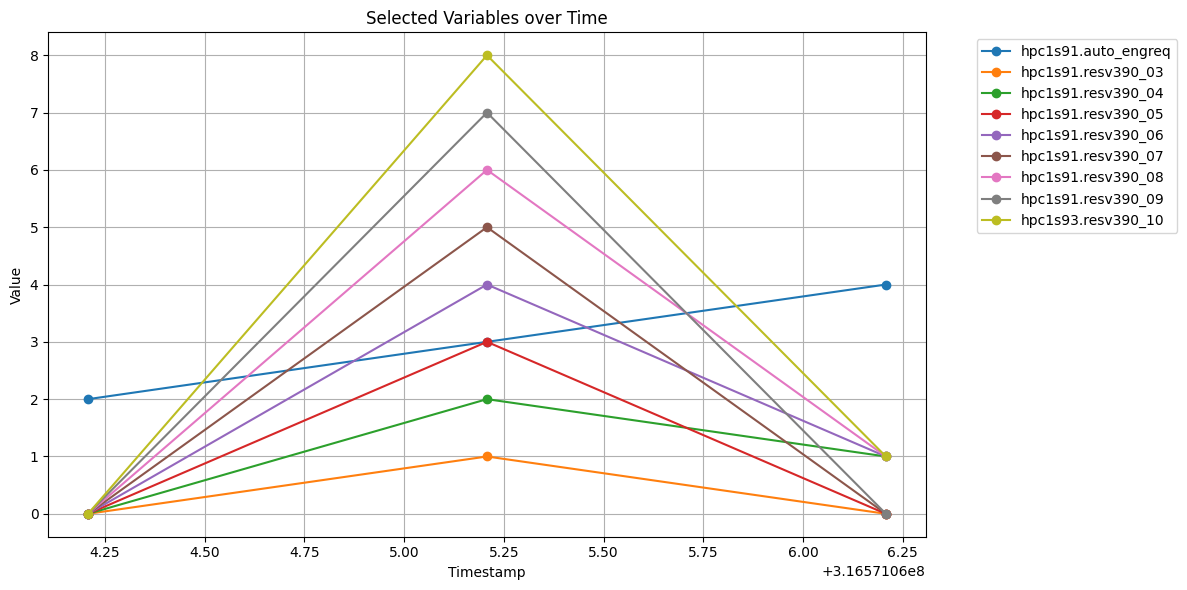

In [16]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# .txtファイルから変数名を読み込む
txt_file = 'select.txt'  # 変数名が列挙されたテキストファイルのパス

try:
    with open(txt_file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    # 空白行を除去し、BOMを削除
    selected_vars = []
    for line in lines:
        line = line.strip()
        # BOMを削除
        if line.startswith('\ufeff'):
            line = line[1:]
        if line:  # 空でない行のみ追加
            selected_vars.append(line)
    
    print(f"読み込まれた変数: {selected_vars}")
    print(f"変数の数: {len(selected_vars)}")
    
    # JSONファイルを読み込む
    with open('sampla.json', 'r') as f:
        data = json.load(f)
    
    # DataFrameに変換
    df = pd.DataFrame(data)
    
    print(f"データベースのカラム: {df.columns.tolist()}")
    
    # timestampを数値に変換
    df['timestamp'] = pd.to_numeric(df['timestamp'])
    
    # 指定された変数 + timestamp を抽出
    cols_to_keep = ['timestamp'] + [col for col in selected_vars if col in df.columns]
    
    print(f"抽出対象カラム: {cols_to_keep}")
    print(f"見つかったカラム: {[col for col in selected_vars if col in df.columns]}")
    print(f"見つからなかったカラム: {[col for col in selected_vars if col not in df.columns]}")
    
    df_filtered = df[cols_to_keep]
    
    print(f"\n抽出されたデータ:")
    print(df_filtered)
    
    # プロット
    plt.figure(figsize=(12, 6))
    
    plot_cols = [col for col in df_filtered.columns if col != 'timestamp']
    
    if plot_cols:
        for col in plot_cols:
            plt.plot(df_filtered['timestamp'], df_filtered[col], marker='o', label=col)
        
        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        plt.title('Selected Variables over Time')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        print("警告: プロット対象の変数がありません")
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
except FileNotFoundError:
    print(f"エラー: {txt_file} が見つかりません。")
    
except Exception as e:
    print(f"エラーが発生しました: {e}")
    print(f"エラー: {e.filename} が見つかりません。")

## variables.txt ファイルの作成例

プロジェクトのルートに `variables.txt` ファイルを作成して、以下のように変数名を1行ずつ列挙してください：

```
hpc1s91.auto_engreq
hpc1s91.resv390_03
hpc1s91.resv390_05
```

このファイルにリストされた変数のみが抽出され、プロットされます。

# sampla.json データ分析

`sampla.json` から読み込んだデータをプロットしています。
- **X軸**: timestamp（タイムスタンプ）
- **Y軸**: その他の変数（auto_engreq、resv390_xx など）

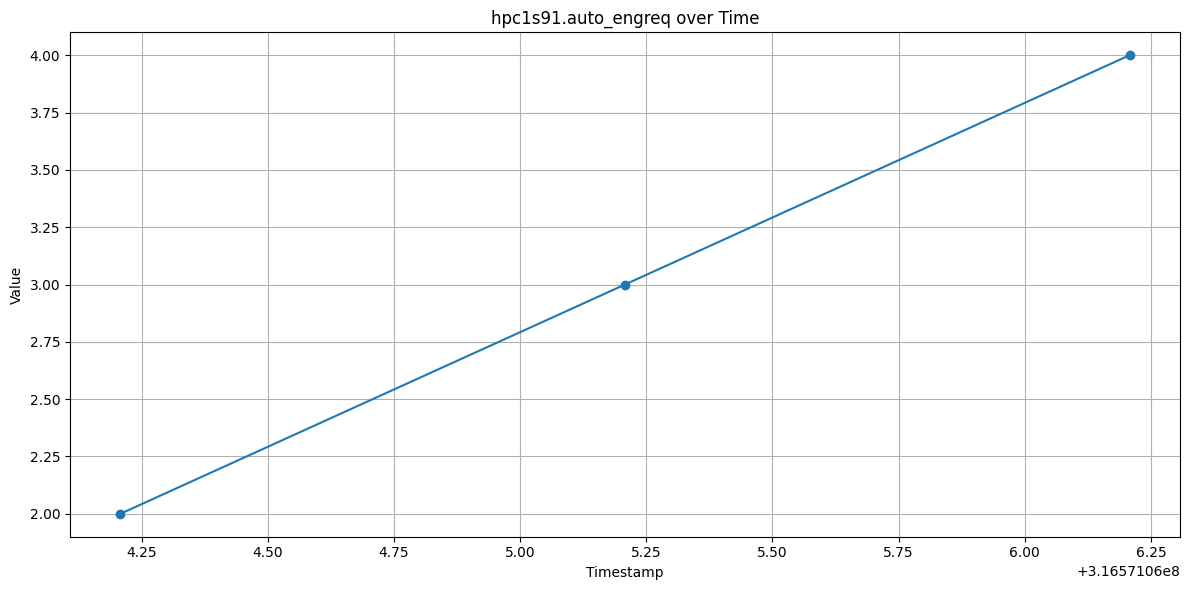

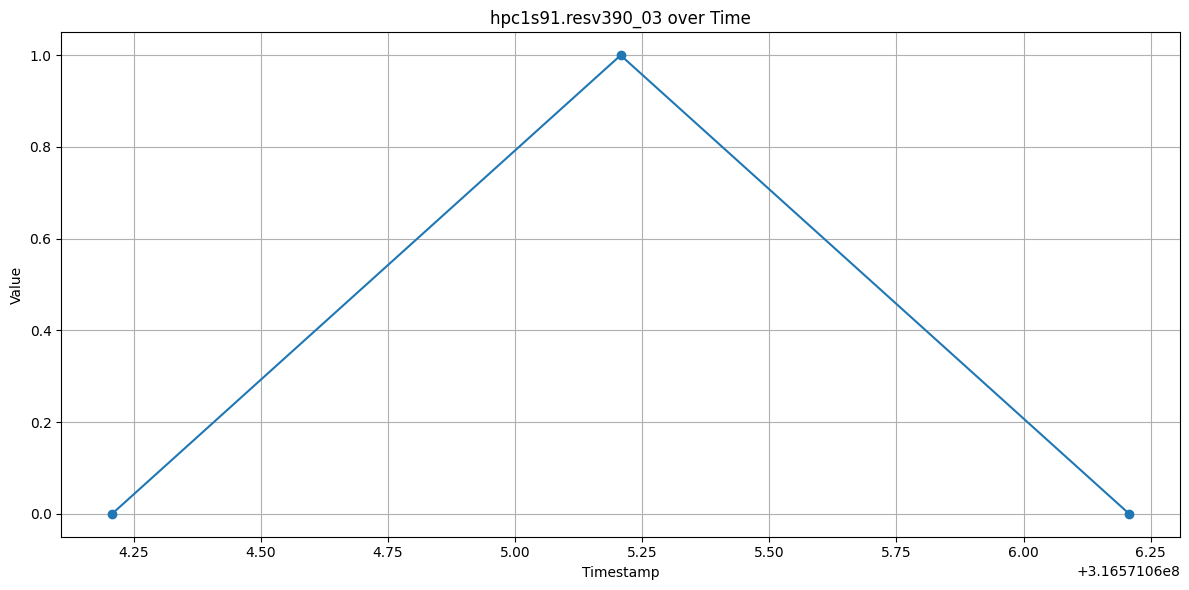

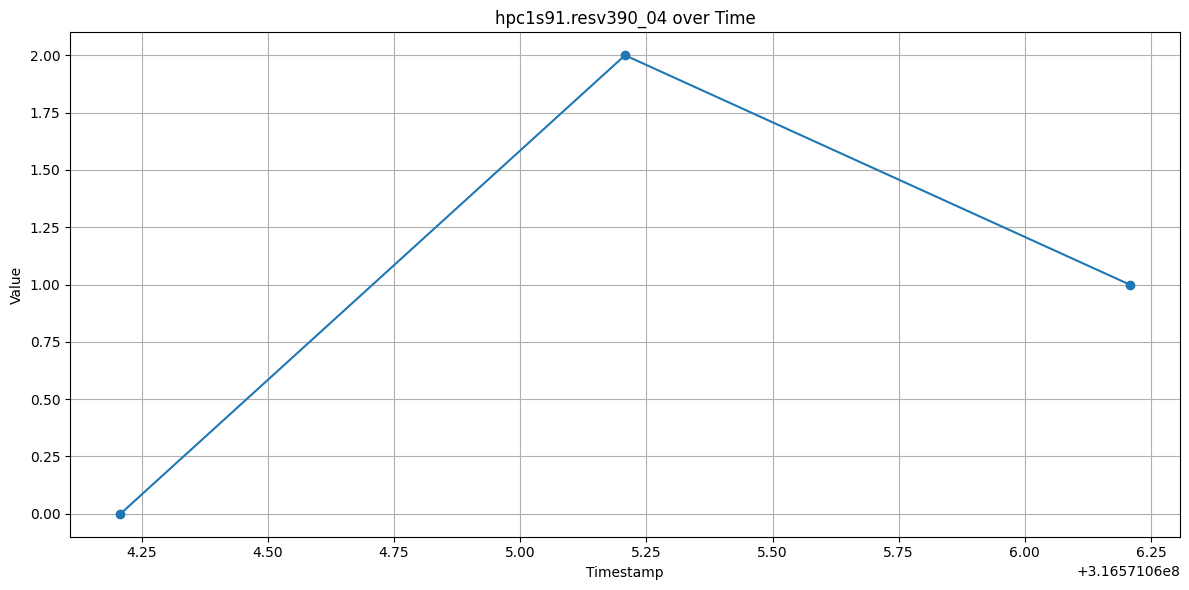

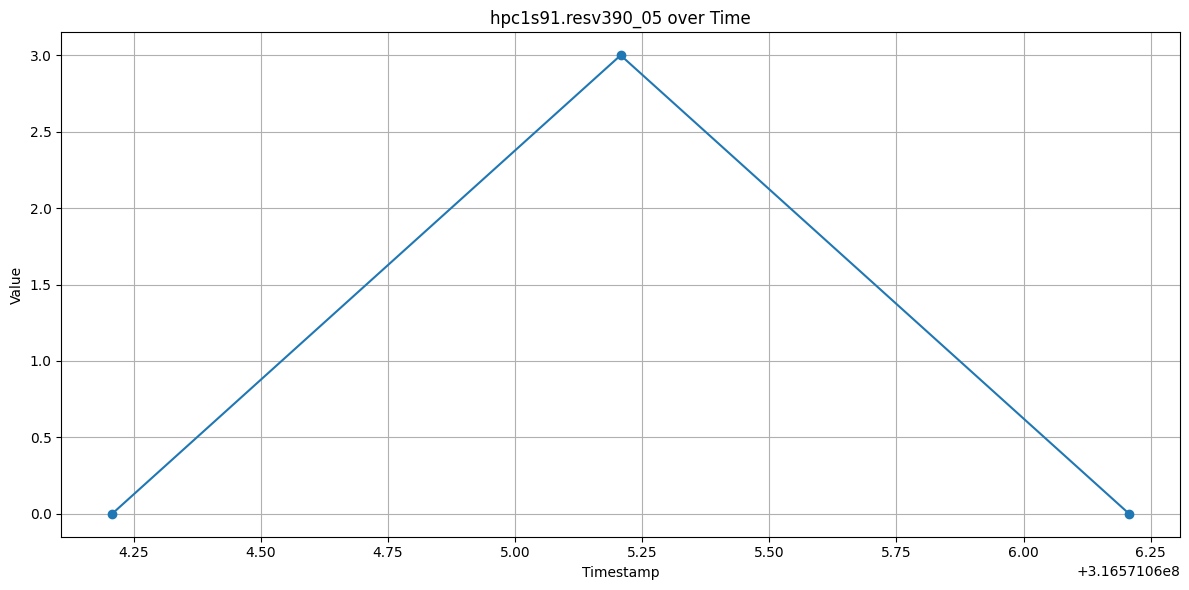

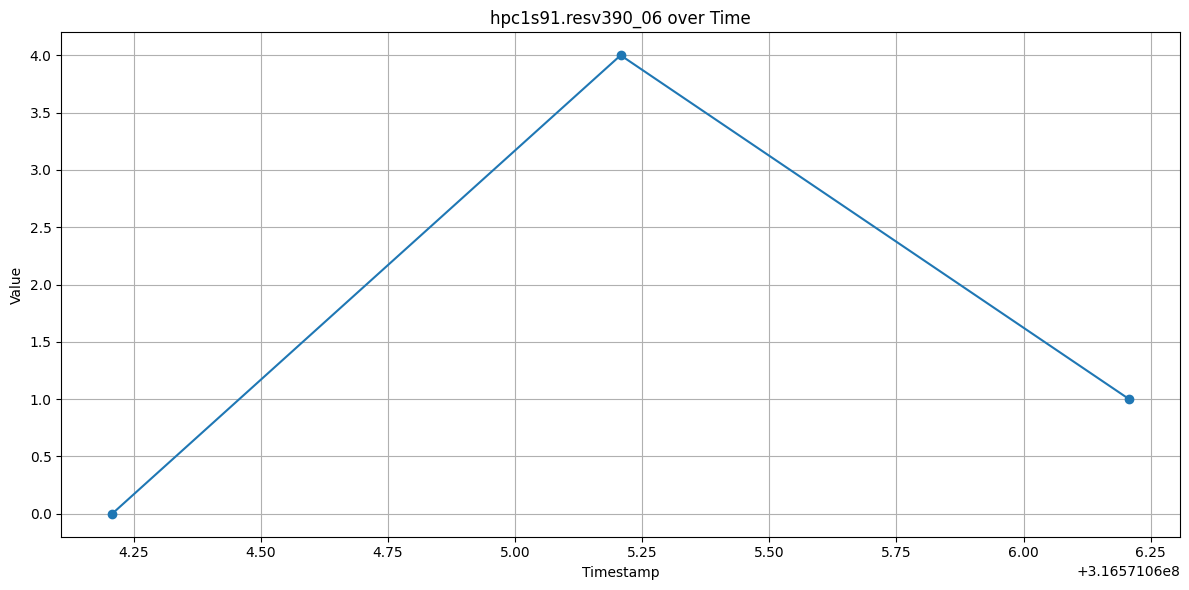

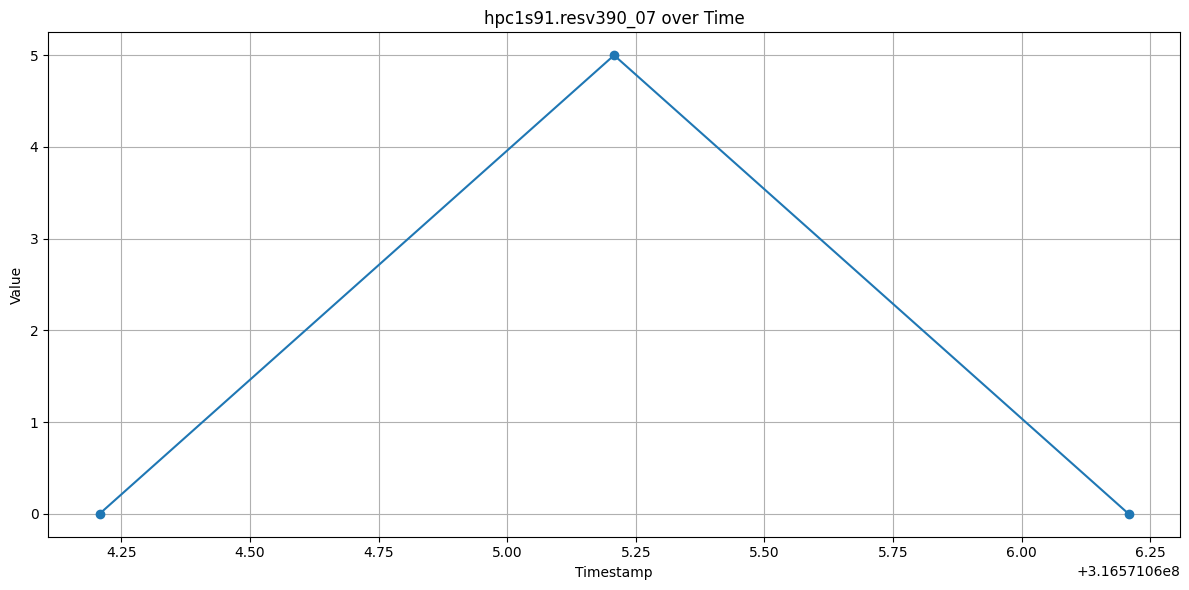

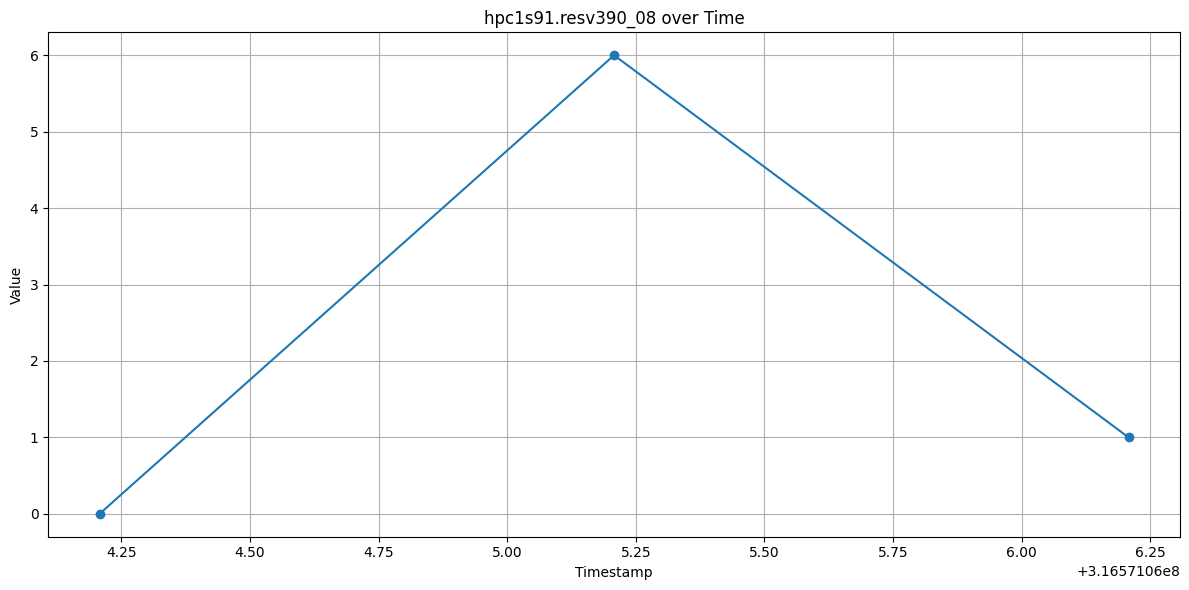

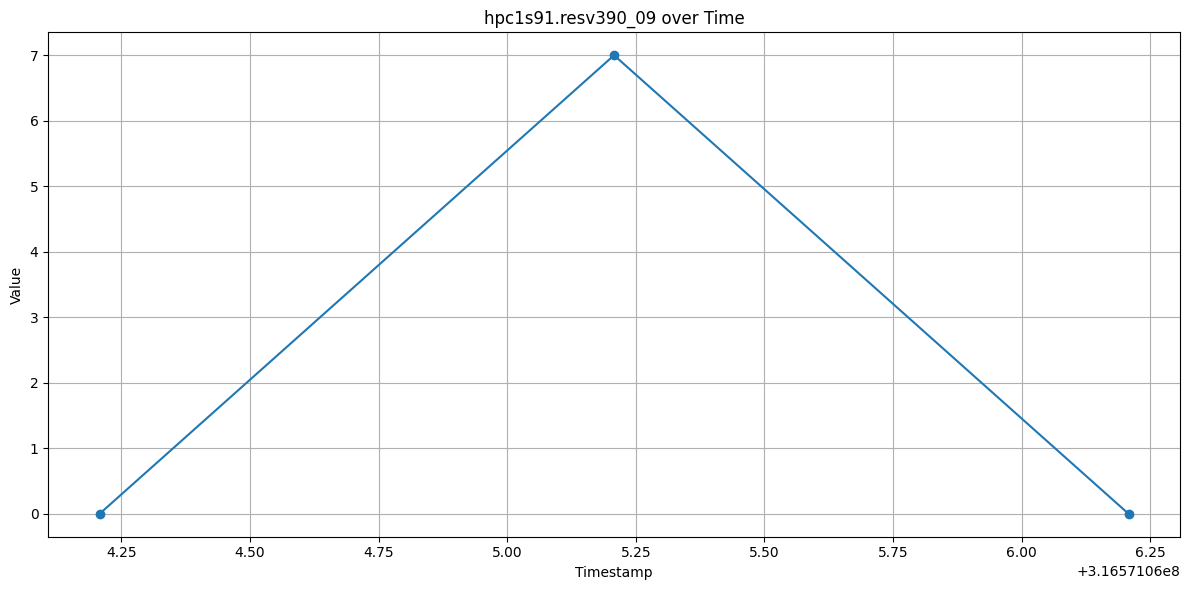

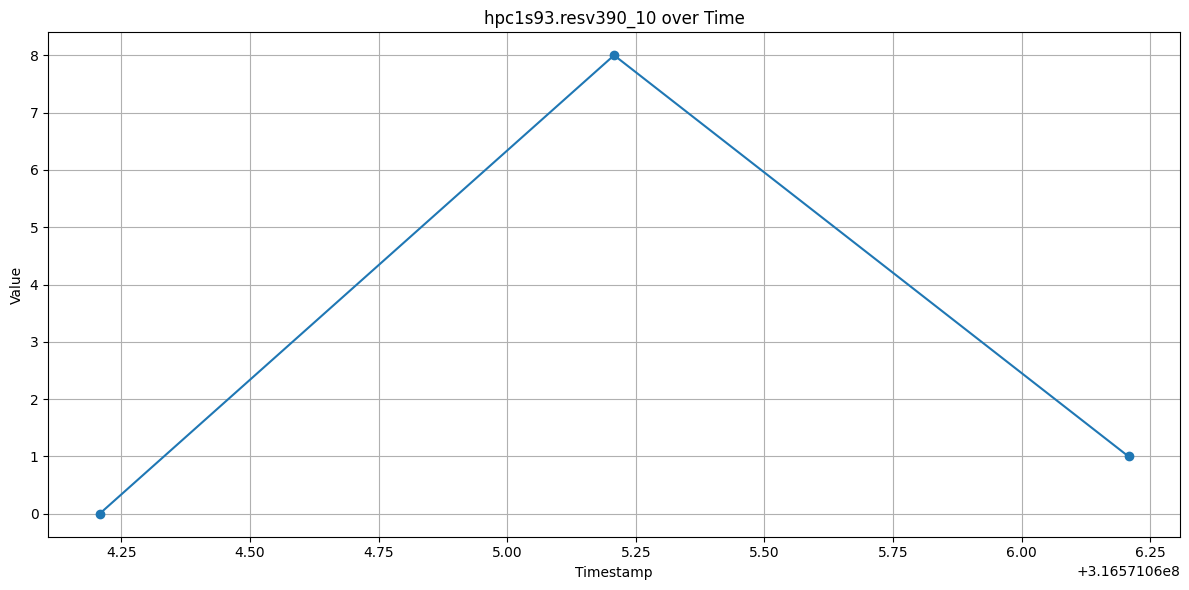

In [17]:
# プロット
# （必要なら時系列順に並べると線が綺麗になります）
df_filtered = df_filtered.sort_values('timestamp')

plot_cols = [col for col in df_filtered.columns if col != 'timestamp']

if plot_cols:
    for col in plot_cols:
        plt.figure(figsize=(12, 6))  # ← ここで毎回、新しいプロット(図)を作る

        plt.plot(df_filtered['timestamp'], df_filtered[col], marker='o')

        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        plt.title(f'{col} over Time')  # 変数名ごとにタイトルを変える
        plt.grid(True)
        plt.tight_layout()

    # まとめて表示（最後に1回だけ）
    plt.show()
else:
    print("警告: プロット対象の変数がありません")


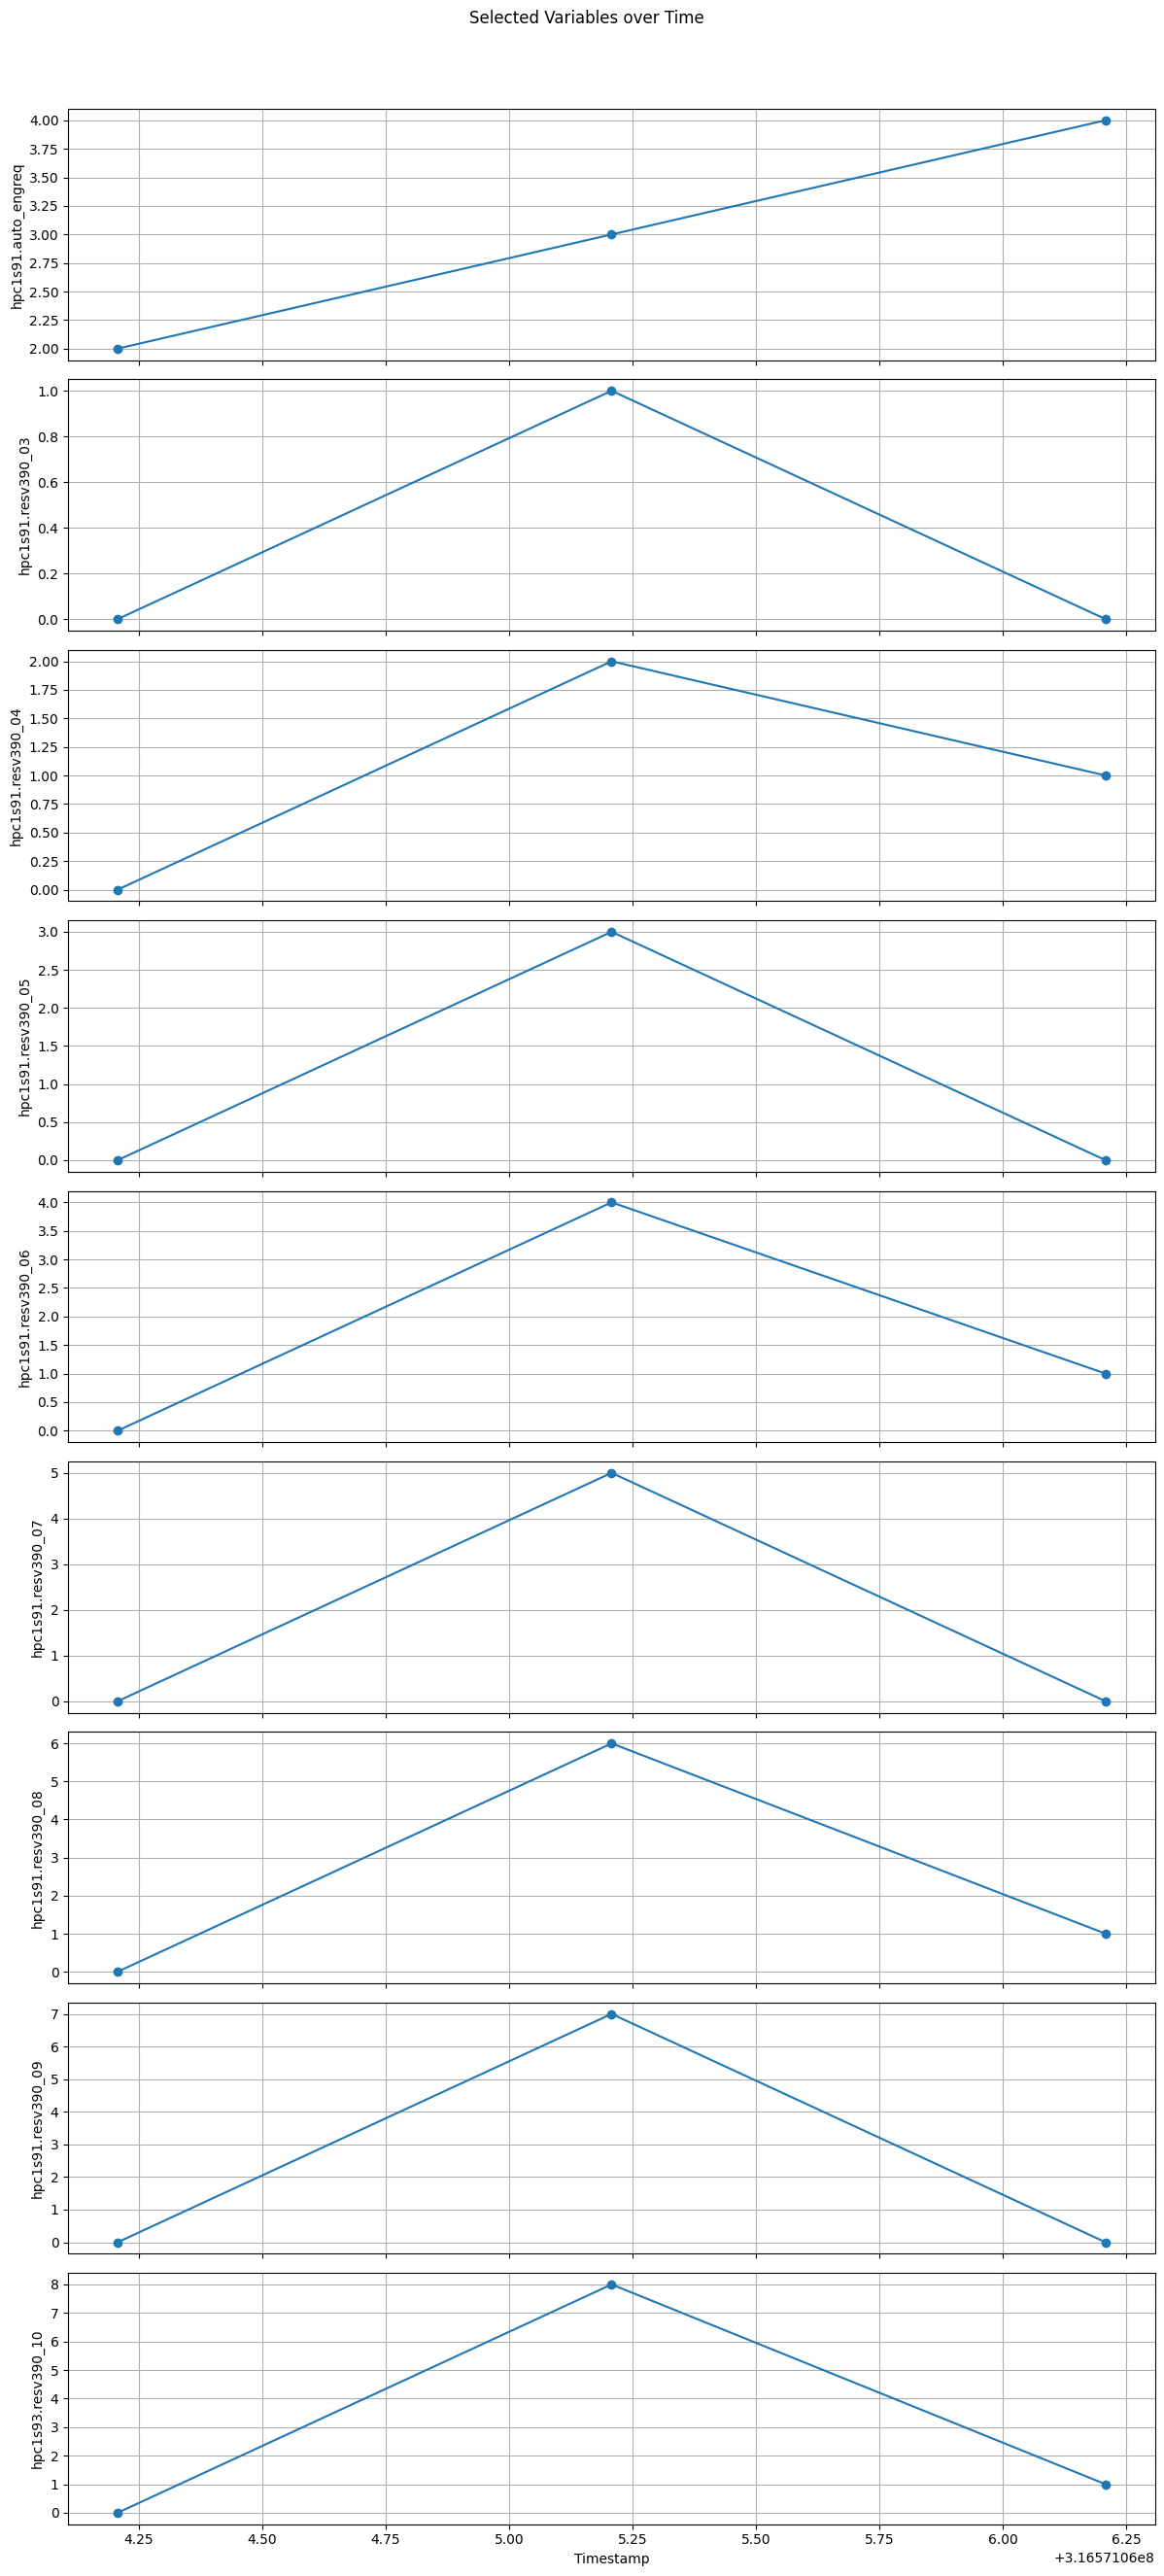

In [18]:
# ===== プロット（subplot版）ここから =====

# 念のため timestamp 順に並べる（線が前後しないように）
df_filtered = df_filtered.sort_values('timestamp')

plot_cols = [col for col in df_filtered.columns if col != 'timestamp']

if not plot_cols:
    print("警告: プロット対象の変数がありません")
else:
    n = len(plot_cols)

    # 変数の数に応じて縦長にする（高さは好みで調整OK）
    fig, axes = plt.subplots(
        nrows=n,
        ncols=1,
        sharex=True,            # x軸（timestamp）を共通化
        figsize=(12, 3 * n)     # 1段あたり高さ3インチのイメージ
    )

    # n=1 のとき axes が1個のオブジェクトになるのでリスト化
    if n == 1:
        axes = [axes]

    for ax, col in zip(axes, plot_cols):
        ax.plot(df_filtered['timestamp'], df_filtered[col], marker='o')
        ax.set_ylabel(col)      # どの変数か分かるように左側に変数名
        ax.grid(True)

    axes[-1].set_xlabel('Timestamp')
    fig.suptitle('Selected Variables over Time')
    fig.tight_layout(rect=[0, 0, 1, 0.96])  # suptitle 分の余白を確保

    plt.show()

# ===== プロット（subplot版）ここまで =====


読み込まれた変数: ['hpc1s91.auto_engreq', 'hpc1s91.resv390_03', 'hpc1s91.resv390_04', 'hpc1s91.resv390_05', 'hpc1s91.resv390_06', 'hpc1s91.resv390_07', 'hpc1s91.resv390_08', 'hpc1s91.resv390_09', 'hpc1s93.resv390_10']
変数の数: 9
データベースのカラム: ['timestamp', 'hpc1s91.auto_engreq', 'hpc1s91.resv390_03', 'hpc1s91.resv390_04', 'hpc1s91.resv390_05', 'hpc1s91.resv390_06', 'hpc1s91.resv390_07', 'hpc1s91.resv390_08', 'hpc1s91.resv390_09', 'hpc1s93.resv390_10']
抽出対象カラム: ['timestamp', 'hpc1s91.auto_engreq', 'hpc1s91.resv390_03', 'hpc1s91.resv390_04', 'hpc1s91.resv390_05', 'hpc1s91.resv390_06', 'hpc1s91.resv390_07', 'hpc1s91.resv390_08', 'hpc1s91.resv390_09', 'hpc1s93.resv390_10']
見つかったカラム: ['hpc1s91.auto_engreq', 'hpc1s91.resv390_03', 'hpc1s91.resv390_04', 'hpc1s91.resv390_05', 'hpc1s91.resv390_06', 'hpc1s91.resv390_07', 'hpc1s91.resv390_08', 'hpc1s91.resv390_09', 'hpc1s93.resv390_10']
見つからなかったカラム: []

抽出されたデータ:
      timestamp  hpc1s91.auto_engreq  hpc1s91.resv390_03  hpc1s91.resv390_04  \
0  3.165711e+08   

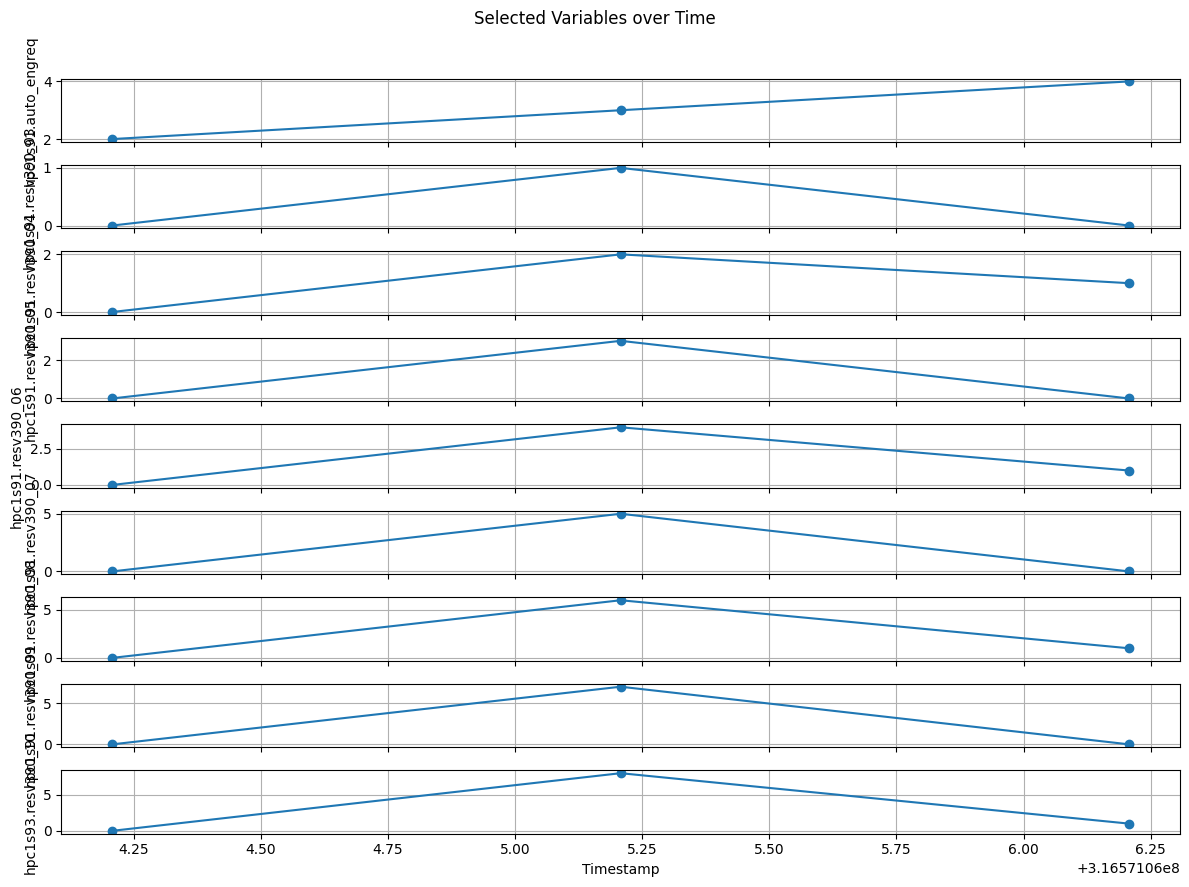

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# .txtファイルから変数名を読み込む
txt_file = 'select.txt'  # 変数名が列挙されたテキストファイルのパス

try:
    with open(txt_file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    # 空白行を除去し、BOMを削除
    selected_vars = []
    for line in lines:
        line = line.strip()
        # BOMを削除
        if line.startswith('\ufeff'):
            line = line[1:]
        if line:  # 空でない行のみ追加
            selected_vars.append(line)
    
    print(f"読み込まれた変数: {selected_vars}")
    print(f"変数の数: {len(selected_vars)}")
    
    # JSONファイルを読み込む
    with open('sampla.json', 'r') as f:
        data = json.load(f)
    
    # DataFrameに変換
    df = pd.DataFrame(data)
    
    print(f"データベースのカラム: {df.columns.tolist()}")
    
    # timestampを数値に変換
    df['timestamp'] = pd.to_numeric(df['timestamp'])
    
    # 指定された変数 + timestamp を抽出
    cols_to_keep = ['timestamp'] + [col for col in selected_vars if col in df.columns]
    
    print(f"抽出対象カラム: {cols_to_keep}")
    print(f"見つかったカラム: {[col for col in selected_vars if col in df.columns]}")
    print(f"見つからなかったカラム: {[col for col in selected_vars if col not in df.columns]}")
    
    df_filtered = df[cols_to_keep]
    
    print(f"\n抽出されたデータ:")
    print(df_filtered)
    
    # # プロット
    # plt.figure(figsize=(12, 6))
    
    # plot_cols = [col for col in df_filtered.columns if col != 'timestamp']
    
    # if plot_cols:
    #     for col in plot_cols:
    #         plt.plot(df_filtered['timestamp'], df_filtered[col], marker='o', label=col)
        
    #     plt.xlabel('Timestamp')
    #     plt.ylabel('Value')
    #     plt.title('Selected Variables over Time')
    #     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # else:
    #     print("警告: プロット対象の変数がありません")
    
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()
    
except FileNotFoundError:
    print(f"エラー: {txt_file} が見つかりません。")
    
except Exception as e:
    print(f"エラーが発生しました: {e}")
    print(f"エラー: {e.filename} が見つかりません。")

# ===== プロット（subplot版）ここから =====

# 念のため timestamp 順に並べる（線が前後しないように）
df_filtered = df_filtered.sort_values('timestamp')

plot_cols = [col for col in df_filtered.columns if col != 'timestamp']

if not plot_cols:
    print("警告: プロット対象の変数がありません")
else:
    n = len(plot_cols)

    # 変数の数に応じて縦長にする（高さは好みで調整OK）
    fig, axes = plt.subplots(
        nrows=n,
        ncols=1,
        sharex=True,            # x軸（timestamp）を共通化
        figsize=(12, 1 * n)     # 1段あたり高さ3インチのイメージ
    )

    # n=1 のとき axes が1個のオブジェクトになるのでリスト化
    if n == 1:
        axes = [axes]

    for ax, col in zip(axes, plot_cols):
        ax.plot(df_filtered['timestamp'], df_filtered[col], marker='o')
        # ax.set_ylabel(col)      # どの変数か分かるように左側に変数名
        # ax.grid(True)
        ax.set_title(col)
        ax.set_ylabel("Value")


    axes[-1].set_xlabel('Timestamp')
    fig.suptitle('Selected Variables over Time')
    fig.tight_layout(rect=[0, 0, 1, 0.96])  # suptitle 分の余白を確保

    plt.show()

# ===== プロット（subplot版）ここまで =====
